In [8]:
from PIL import Image
import os

# Define the directory containing the images
directory = 'dataset'

# Define the target size for the images
target_size = (224, 224)  # Replace with the desired size

# Loop over all images in the directory and resize them
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file.endswith('.jpg'):
                try:
                    # Open the image
                    img = Image.open(file_path)
                    
                    # Resize the image
                    img = img.resize(target_size)
                    
                    # Save the resized image
                    img.save(file_path)
                except PIL.UnidentifiedImageError:
                    # Skip the image if it cannot be identified
                    print(f'Skipping {file_path} as it cannot be identified as an image')


In [2]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# Loading the data from the folder on desktop
data_dir = r"dataset"
dataset = ImageFolder(root=data_dir, transform=transform)

partitioning the dataset into training, validation, and test sets


In [3]:
train_size = int(0.8 * len(dataset))
val_size = test_size = (len(dataset) - train_size) // 2
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Creating data loaders for each set
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


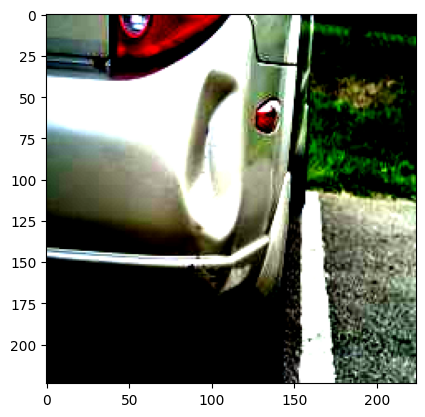

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


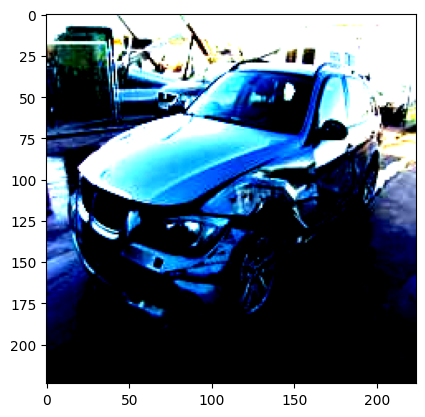

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


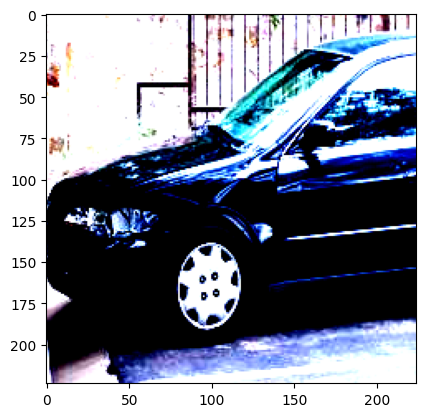

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


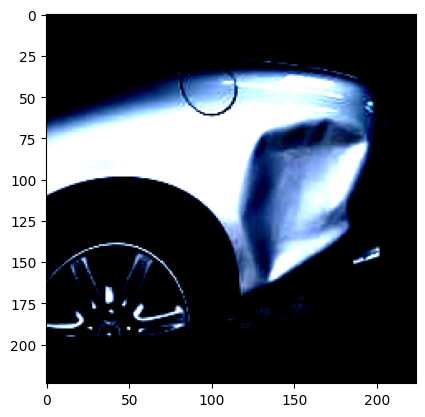

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


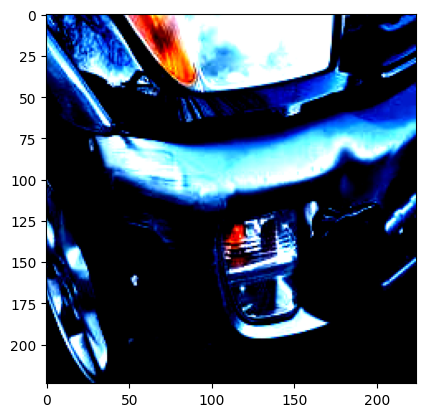

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


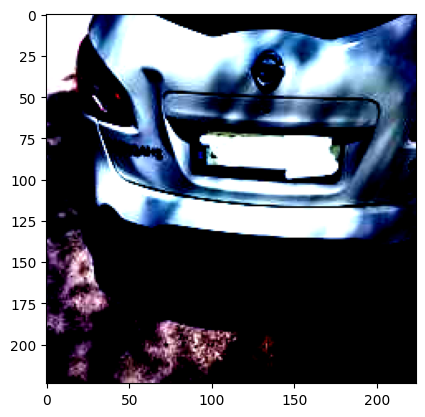

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


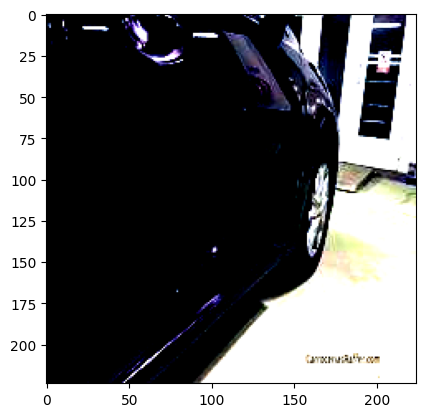

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


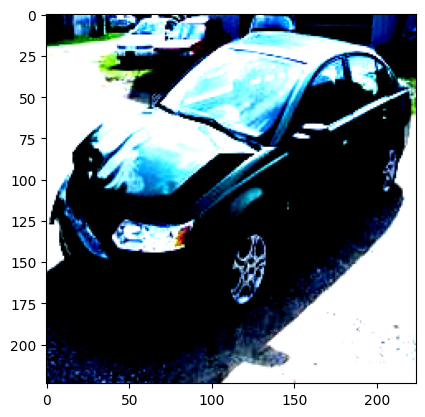

In [14]:
import matplotlib.pyplot as plt

batch_size = 8
count = 0
for i, (inputs, targets) in enumerate(train_loader):
    # visualizing the first sample of each minibatch of size 8
    plt.imshow(inputs[0].permute(1, 2, 0))
    plt.show()
    
    count += 1
    if count == batch_size:  # break after visualizing the first sample of 8 minibatches
        count = 0
        if i == len(train_loader)-1:
            break


loading pretrained model

In [1]:

import torchvision.models as models

# Load the ResNet-50 model with pre-trained weights
model1 = models.resnet50(pretrained=True)

C:\Users\Rishitha Reddy\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Rishitha Reddy\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Rishitha Reddy/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:01<00:00, 53.6MB/s]


Fine tuning pretrained model

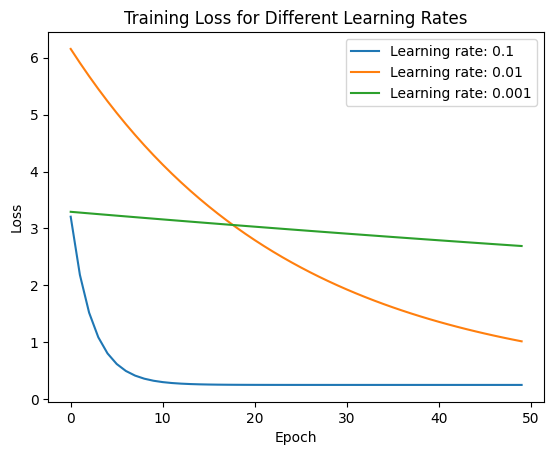

In [28]:
# Define the loss function
criterion = nn.MSELoss()

# Train the model for 3 different learning rates
learning_rates = [0.1, 0.01, 0.001]
for lr in learning_rates:
    # Reset the model and optimizer
    model = model1
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Train the model
    num_epochs = 50
    loss_values = []
    for epoch in range(num_epochs):
        # Convert data to the correct data type
        inputs = x_train.float()
        targets = y_train.float()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss value
        loss_values.append(loss.item())

    # Plot the loss vs epoch graph
    plt.plot(range(num_epochs), loss_values, label=f'Learning rate: {lr}')

# Add legend, x/y labels, and title
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Different Learning Rates')
plt.show()


sample images after loss function and optimizer

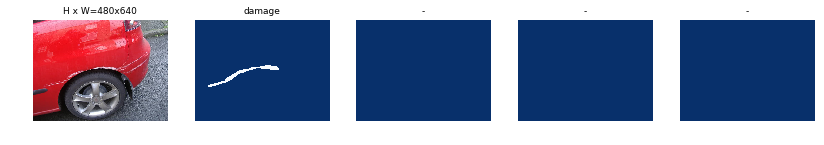

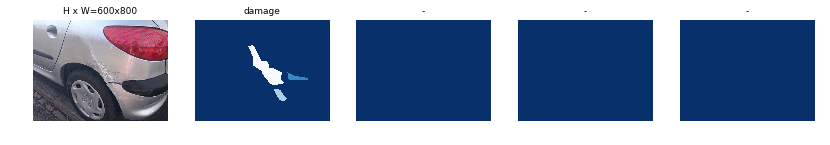

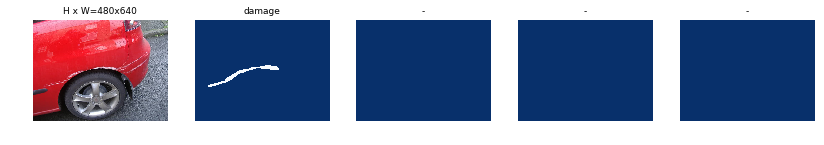

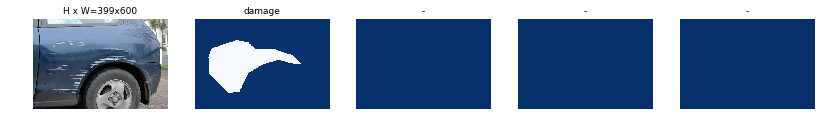

In [4]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  float64
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (2, 4)                min:  133.00000  max:  951.00000  int32
mask                     shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool


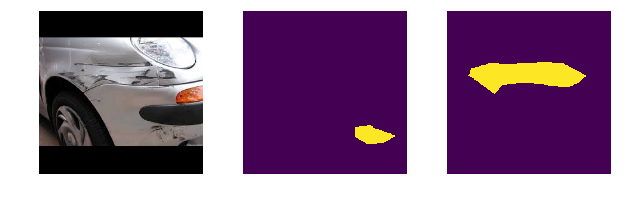

In [7]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

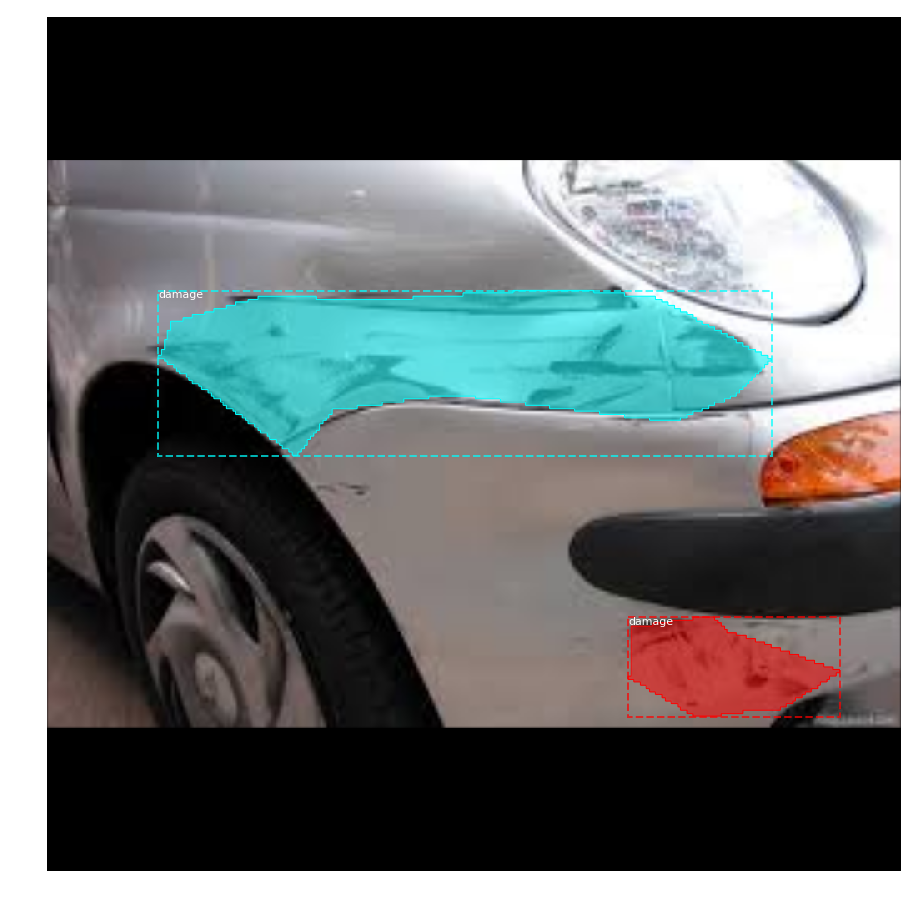

In [8]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

Evaluate the model on the test set

In [20]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
Average percent: 0.33
